## Skitlearn kütüphanesini yüklüyoruz

In [116]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import make_classification   
from sklearn.linear_model import SGDClassifier
#belirli amaçlar için tahmin hatasını değerlendirmek için metrics fonksiyonu  ve o fonksiyonun confusion matris tipini aldık.
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC

## veri setini yüklüyoruz

In [117]:
kanser = datasets.load_breast_cancer()

## Veri kümesini yükledikten sonra,  Özellik ve hedef adlarını kontrol edelim.

In [118]:
# 13 özelliğin ismini yazdırıyoruz
print("Özellik: ", kanser.feature_names)

# Kanserin türünü gösteriyorux
print("Tip: ", kanser.target_names)

Özellik:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Tip:  ['malignant' 'benign']


## şekil kullanarak veri kümesi kontrol edelim

In [119]:
kanser.data.shape

(569, 30)

## ilk 5 kaydı görelim

In [120]:
print(kanser.data[0:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

## kanser tipi kanser mi :0 kanser değil mi: 1

In [121]:
print(kanser.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

## veri setini eğitebilmek için bölmemiz gerekir

In [145]:
#sklearn kütüphanesinden train_test_split fonksiyonunu ekliyoruz böylece verimizi bölmüş oluyoruz

# Eğitim ve test olarak ayırıyoruz ve  70% eğitim için  30% test için ayırıyoruz test_size (test veri oranı) 
#random_state rastegele veri seçmemiz için tanımlıyoruz
X_train, X_test, y_train, y_test = train_test_split(kanser.data, kanser.target, test_size=0.3,random_state=109) 

X, y = make_classification(random_state=0)


## Şimdi modelimizi svm sınıflandırıcısına aktarıyoruz

## fit metodu ile train(eğitim verisini) eğitime alın ve predict (tahmin verisi) ile tahmin edin


e = svm.SVC(kernel='rbf') # rbf modeli kullanacağımızı belirtiyoruz
e = svm.SVC(kernel='poly') # Polinomal modeli kullanacağımızı belirtiyoruz


In [146]:
#Svm kütüphanesini ekledik
#Svm sınıflandırıcısını oluşturduk

kernel_poly =SVC(random_state=0)

#################################################  POLY MODEL #########################

kernel_poly = SVC(kernel='poly') # Polinomal modeli kullanacağımızı belirtiyoruz

#Eğitim setleri ile modeli eğitiyoruz
kernel_poly.fit(X_train, y_train)

#Test kümesi ile tahmin etmeye çalışıyoruz
y_pred_poly = kernel_poly.predict(X_test)

## polinomal modele göre eğittik sıra confusion matriksi çizdirmede



## Confusion Matrixsinin çizilmesi

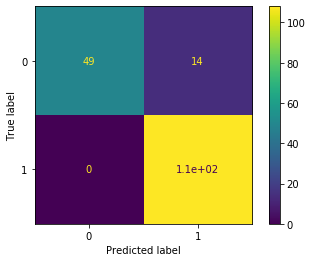

In [147]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
SVC(random_state=0)
predictions = kernel_poly.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=kernel_poly.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=kernel_poly.classes_)
disp.plot()
plt.show()

##  Modelin Değerlendirilmesi
Sınıflandırıcının veya modelin hastaların kanserini ne kadar doğru tahmin edebileceğini tahmin edelim.

Doğruluk, gerçek test seti değerleri ile tahmin edilen değerler karşılaştırılarak hesaplanabilir.

In [148]:
#belirli amaçlar için tahmin hatasını değerlendirmek için metrics fonksiyonu  ve o fonksiyonun confusion matris tipini aldık.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Model Doğruluğu: sınıflandırıcı ne sıklıkla doğrudur?
print("Doğruluk:",metrics.accuracy_score(y_test, y_pred_poly))

# Modelin kesinliği : Ne kadarı pozitif 
print("Precision:",metrics.precision_score(y_test, y_pred_poly))

# Hassiyet oranı
print("Recall:",metrics.recall_score(y_test, y_pred_poly))

# F1 Score değeri
print("F1 Score:",metrics.f1_score(y_test, y_pred_poly,average='binary'))

Doğruluk: 0.9181286549707602
Precision: 0.8852459016393442
Recall: 1.0
F1 Score: 0.9391304347826086


In [149]:
import numpy as np
import pandas as pd
import seaborn as sns
#kaçı hasta kaçı sağlıklı birde bunu görelim
kontrol=np.array(confusion_matrix(y_test,y_pred_poly,labels=kernel_poly.classes_ ))
conf=pd.DataFrame(kontrol,index=['kanser','sağlıklı'],
                 columns=['tahmini kanser','tahmini sağlık'])
conf

,tahmini kanser,tahmini sağlık
kanser,49,14
sağlıklı,0,108


## Linear modele göre eğitelim

In [150]:
#Svm kütüphanesini ekledik

#Svm sınıflandırıcısını oluşturduk
linear_model =SVC(random_state=0)

#################################################  LINEAR MODEL #########################
linear_model = SVC(kernel='linear')

#Eğitim setleri ile modeli eğitiyoruz
linear_model.fit(X_train, y_train)

#Test kümesi ile tahmin etmeye çalışıyoruz
y_pred_linear = linear_model.predict(X_test)

## linear modele göre eğittik sıra confusion matriksi çizdirmede


## Linear Model Confusion Matrixsi

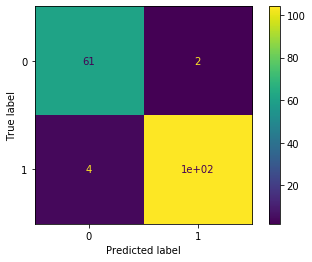

In [151]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
SVC(random_state=0)
predictions_linear = linear_model.predict(X_test)
linear = confusion_matrix(y_test, predictions_linear, labels=linear_model.classes_)
disp_linear = ConfusionMatrixDisplay(confusion_matrix=linear,
display_labels=linear_model.classes_)
disp_linear.plot()
plt.show()

In [152]:
#belirli amaçlar için tahmin hatasını değerlendirmek için metrics fonksiyonu  ve o fonksiyonun confusion matris tipini aldık.
from sklearn import metrics 
# Model Doğruluğu: sınıflandırıcı ne sıklıkla doğrudur?
print("Doğruluk:",metrics.accuracy_score(y_test, y_pred_linear))

# Modelin kesinliği : Ne kadarı pozitif 
print("Precision:",metrics.precision_score(y_test, y_pred_linear))

# Hassiyet oranı
print("Recall:",metrics.recall_score(y_test, y_pred_linear))

# F1 Score değeri
print("F1 Score:",metrics.f1_score(y_test, y_pred_linear,average='binary'))

Doğruluk: 0.9649122807017544
Precision: 0.9811320754716981
Recall: 0.9629629629629629
F1 Score: 0.9719626168224299


In [153]:
import numpy as np
import pandas as pd
#kaçı hasta kaçı sağlıklı birde bunu görelim
kontrol_linear=np.array(confusion_matrix(y_test,y_pred_linear,labels=linear_model.classes_ ))
conf_linear=pd.DataFrame(kontrol_linear,index=['kanser','sağlıklı'],
                 columns=['tahmini kanser','tahmini sağlık'])
conf_linear

,tahmini kanser,tahmini sağlık
kanser,61,2
sağlıklı,4,104


## RBF modele göre eğitelim

In [154]:
#Svm kütüphanesini ekledik

#Svm sınıflandırıcısını oluşturduk
RBF_model =SVC(random_state=0)

#################################################  RBF MODEL #########################
RBF_model = SVC(kernel='rbf')

#Eğitim setleri ile modeli eğitiyoruz
RBF_model.fit(X_train, y_train)

#Test kümesi ile tahmin etmeye çalışıyoruz
y_pred_rbf = RBF_model.predict(X_test)

## rbf modele göre eğittik sıra confusion matriksi çizdirmede

## RBF Model Confusion Matrixsi


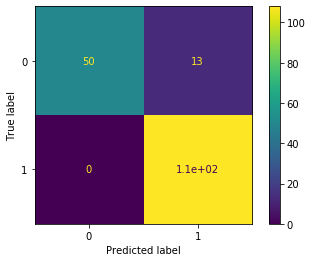

In [155]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
SVC(random_state=0)
predictions_rbf = RBF_model.predict(X_test)
rbf = confusion_matrix(y_test, predictions_rbf, labels=RBF_model.classes_)
disp_rbf = ConfusionMatrixDisplay(confusion_matrix=rbf,
display_labels=RBF_model.classes_)
disp_rbf.plot()
plt.show()

##  Modelin Değerlendirilmesi
Sınıflandırıcının veya modelin hastaların meme kanserini ne kadar doğru tahmin edebileceğini tahmin edelim.

Doğruluk, gerçek test seti değerleri ile tahmin edilen değerler karşılaştırılarak hesaplanabilir.

In [156]:
#belirli amaçlar için tahmin hatasını değerlendirmek için metrics fonksiyonu  ve o fonksiyonun confusion matris tipini aldık.
from sklearn import metrics 
# Model Doğruluğu: sınıflandırıcı ne sıklıkla doğrudur?
print("Doğruluk:",metrics.accuracy_score(y_test, y_pred_rbf))

# Modelin kesinliği : Ne kadarı pozitif 
print("Precision:",metrics.precision_score(y_test, y_pred_rbf))

# Hassiyet oranı
print("Recall:",metrics.recall_score(y_test, y_pred_rbf))

# F1 Score değeri
print("F1 Score:",metrics.f1_score(y_test, y_pred_rbf,average='binary'))

Doğruluk: 0.9239766081871345
Precision: 0.8925619834710744
Recall: 1.0
F1 Score: 0.9432314410480349


In [157]:
import numpy as np
import pandas as pd
import seaborn as sns
#kaçı hasta kaçı sağlıklı birde bunu görelim
kontrol_rbf=np.array(confusion_matrix(y_test,y_pred_rbf,labels=RBF_model.classes_ ))
conf_rbf=pd.DataFrame(kontrol_rbf,index=['kanser','sağlıklı'],
                 columns=['tahmini kanser','tahmini sağlık'])
conf_rbf

,tahmini kanser,tahmini sağlık
kanser,50,13
sağlıklı,0,108
